# Group Activity - Group 6 - Week 10

In [1]:
import pandas as pd
import numpy as np

###### 1. Load the data into the pandas environment and identify some basic details of the dataset.
###### 2. Reset the index as "name" as the index.

In [91]:
data=pd.read_csv('employee.csv', index_col='name')
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


###### 3. Select rows for specific names Jack Morgan and Josh wills.

In [93]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


##### 4. Select data for multiple values "Sales" and “Finance”.

In [94]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [95]:
data['department'].unique()

array(['Operations', 'Finance', 'Sales'], dtype=object)

In [96]:
data.loc[(data['department']=='Finance') | (data['department']=='Sales')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


##### 5. Display employee who has more than 700 performance score.

In [97]:
data.loc[data['performance_score']>700,['performance_score']]

,performance_score
name,
Allen Smith,723
Dheeraj Patel,711
Josh Wills,901
Leo Duck,709


###### 6. Display employee who has more than 500 and less than 700 performance score

In [98]:
data.loc[(data['performance_score']<700) & (data['performance_score']>500),['performance_score']]

,performance_score
name,
S Kumar,520
Jack Morgan,674
Ying Chin,556
Satyam Sharma,649


##### 7.Check and handle missing values in the dataset.

In [99]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [102]:
# Filling missing values in gender column
data.loc['Allen Smith' ,'gender'] = 'M'
data.loc['Satyam Sharma' ,'gender'] = 'M'

In [103]:
# filling missing values in age column by median method
data['age'].fillna((data['age'].median()), inplace=True)

In [104]:
# filling missing values in income column by mean method
data['income'].fillna((data['income'].mean()), inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,M,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,M,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [11]:
# alternative way to remove na removing raws containing null values
df=data.dropna()
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


##### 8. Check the outliers and handle outliers in performance score using Percentiles.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Performance score box plot')

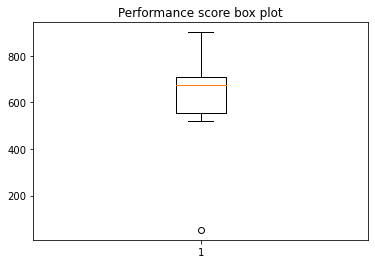

In [105]:
plt.boxplot(data['performance_score'])
plt.title('Performance score box plot')

From the boxplot it is clear that there is an outlier below lower limit

In [106]:
# calculating 1st, 2nd and 3rd quartiles
Q1=np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2=np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3=np.percentile(data['performance_score'], 75, interpolation='midpoint')
print ("Q1 :", Q1)
print ("Q2 :", Q2)
print ("Q3 :", Q3)

Q1 : 556.0
Q2 : 674.0
Q3 : 711.0


In [107]:
# calculating Lower and Upper limit
IQR= Q3-Q1
Low_lim= Q1-(1.5*IQR)
Up_lim= Q3+(1.5*IQR)
print("Inter Quartile Range : ",IQR)
print("Lower Limit : ",Low_lim)
print("Upper Limit : ",Up_lim)

Inter Quartile Range :  155.0
Lower Limit :  323.5
Upper Limit :  943.5


In [108]:
print("Less than Lower Limit : ",data['performance_score']<Low_lim, "\n")
print("Greater than Upper Limit : ",data['performance_score']>Up_lim)

Less than Lower Limit :  name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur      True
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool 

Greater than Upper Limit :  name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur     False
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool


The Employee James Authur performance score is an outlier, for this employee also income value is also missing, so dropping the data of James Authur

In [109]:
data.drop(['James Authur'], inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,M,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,M,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


#### 9. Check the gender column and do Dummy encoding

In [111]:
#there are two unique values in gender column
data.gender.nunique() #this code will give the No of unique values in a column

2

In [112]:
data1=pd.get_dummies(data['gender'])
data1

,F,M
name,,
Allen Smith,0,1
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,0,1
Josh Wills,1,0
Leo Duck,0,1


#### 10.Do the standard scaling on the feature performance score

In [113]:
from sklearn import preprocessing

In [120]:
data2=pd.get_dummies(data)
data2

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.0,52857.142857,723,0,1,0,1,0,0,0,1,0
S Kumar,45.0,16000.000000,520,1,0,1,0,0,1,0,0,0
Jack Morgan,32.0,35000.000000,674,0,1,1,0,0,0,1,0,0
Ying Chin,45.0,65000.000000,556,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.0,42000.000000,711,1,0,0,1,0,0,1,0,0
Satyam Sharma,45.0,62000.000000,649,0,1,0,0,1,0,0,1,0
Josh Wills,54.0,52000.000000,901,1,0,1,0,0,0,0,1,0
Leo Duck,23.0,98000.000000,709,0,1,0,0,1,0,0,0,1


In [121]:
data2.describe()

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52857.142857,680.37500,0.500000,0.500000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24097.590700,116.16729,0.534522,0.534522,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,520.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,625.75000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52428.571429,691.50000,0.500000,0.500000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,714.00000,1.000000,1.000000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,901.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [122]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
y=data2['performance_score']
x=data2.drop('performance_score', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions= model.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE is : ", mean_squared_error(y_test, predictions))
print('R Squared Value is : ', r2_score(y_test,predictions))

MSE is :  30427.12222624908
R Squared Value is :  -6.313772544017566


In [123]:
standardization = preprocessing.StandardScaler()
data2[['performance_score']] = standardization.fit_transform(data2[['performance_score']])
data2

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.0,52857.142857,0.392262,0,1,0,1,0,0,0,1,0
S Kumar,45.0,16000.000000,-1.475872,1,0,1,0,0,1,0,0,0
Jack Morgan,32.0,35000.000000,-0.058667,0,1,1,0,0,0,1,0,0
Ying Chin,45.0,65000.000000,-1.144578,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.0,42000.000000,0.281831,1,0,0,1,0,0,1,0,0
Satyam Sharma,45.0,62000.000000,-0.288733,0,1,0,0,1,0,0,1,0
Josh Wills,54.0,52000.000000,2.030331,1,0,1,0,0,0,0,1,0
Leo Duck,23.0,98000.000000,0.263425,0,1,0,0,1,0,0,0,1


In [124]:
data2.describe()

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52857.142857,4.857226e-17,0.500000,0.500000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24097.590700,1.069045e+00,0.534522,0.534522,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,-1.475872e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,-5.026938e-01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52428.571429,1.023793e-01,0.500000,0.500000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,3.094385e-01,1.000000,1.000000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,2.030331e+00,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [125]:
y=data2['performance_score']
x=data2.drop('performance_score', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions= model.predict(x_test)
print("MSE is : ", mean_squared_error(y_test, predictions))
print('R Squared Value is : ', r2_score(y_test,predictions))

MSE is :  2.5768260915611103
R Squared Value is :  -6.313772544016803


standard scaling decreased the value of MSE